In [1]:
colab = False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    #%cp -R "/content/rooftops_detection_from_aerial_images/dataset" "./"
    #%cp -R "/content/rooftops_detection_from_aerial_images/models" "./"
    #%cp -R "/content/rooftops_detection_from_aerial_images/utils" "./"
    !pip install ezdxf -q
    !pip install dbfread -q
    !pip install keras-unet-collection -q
    import os
    os.chdir("/content/rooftops_detection_from_aerial_images")

In [2]:
from utils.config import Config
from utils.dataset_handler import preprocess_data, create_dataset
from run import run_training

import glob
import os
from PIL import Image

Image.MAX_IMAGE_PIXELS = None

c:\Users\aleal\Documents\Tesi\Final_code\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#INTERNAL PARAMETERS pixels
internals = {
    "focal_px" : 100.500 / 0.0046,
    "width" :  23010,
    "height" : 14790,
    "x_offset" : 0.,
    "y_offset" : 0.,
    "psize" : 0.0046
    }
images_paths = glob.glob(os.path.join("images", '*.tif'), recursive=True)
#only for creating validation set
val_names = ['05_26_1892','02_65_1783','02_65_1790','02_65_1796','02_65_1802','03_02_5112','03_09_5071','03_09_5074','03_12_5501','03_17_5768','05_26_1882','05_27_1871']
images_paths = [p for p in images_paths if os.path.basename(p).split(".")[0] in val_names]
print(len(val_names), len(images_paths))
#Creating configuration file
config = Config(
                checkpoints_dir = "Validation_TO1",
                crop_size = 256,
                step = 128,
                scale_factor = 4,
                internals = internals,
                batch_size = 8,
                num_epochs= 30,
                model_name = "unet",
                dsm_path = "05.04_DDSM_1M",
                dbfs_path= "dbfs",
                polylines_path = "DTP_TO_minuta_di_restituzione_01.dxf",
                buffer_path = "buffer1.dxf",
                depth_interpolation = True,
                working_dir = "working_dir",
                preprocessed_dataset_name = "dataset_prova",
                images_paths = images_paths,
                loss = "tversky",
                val_names =  val_names,
                checkpoint = "working_dir/checkpoints/unet_4_256_depthi/UNET.25-0.9655.hdf5"
    )

12 12


In [9]:
preprocess_data(config)

Creating dirs...


In [7]:
create_dataset(config)

['05_26_1892', '02_65_1783', '02_65_1790', '02_65_1796', '02_65_1802', '03_02_5112', '03_09_5071', '03_09_5074', '03_12_5501', '03_17_5768', '05_26_1882', '05_27_1871']
['02_64_1769', '02_64_1773', '02_65_1783', '02_65_1790', '02_65_1796', '02_65_1802', '03_02_5112', '03_09_5071', '03_09_5074', '03_12_5501', '03_17_5768', '05_26_1882', '05_26_1892', '05_27_1871']
Validation set..


 75%|███████▌  | 9/12 [00:00<00:00, 89.98it/s]

Names in dataset:  {'05_26_1892', '03_09_5071', '03_09_5074', '03_02_5112', '02_65_1802', '03_12_5501', '02_65_1790', '02_65_1796', '02_65_1783'}  image name:  05_26_1892
05_26_1892 already present in 256_128_4_depthi, skipping
Names in dataset:  {'05_26_1892', '03_09_5071', '03_09_5074', '03_02_5112', '02_65_1802', '03_12_5501', '02_65_1790', '02_65_1796', '02_65_1783'}  image name:  02_65_1783
02_65_1783 already present in 256_128_4_depthi, skipping
Names in dataset:  {'05_26_1892', '03_09_5071', '03_09_5074', '03_02_5112', '02_65_1802', '03_12_5501', '02_65_1790', '02_65_1796', '02_65_1783'}  image name:  02_65_1790
02_65_1790 already present in 256_128_4_depthi, skipping
Names in dataset:  {'05_26_1892', '03_09_5071', '03_09_5074', '03_02_5112', '02_65_1802', '03_12_5501', '02_65_1790', '02_65_1796', '02_65_1783'}  image name:  02_65_1796
02_65_1796 already present in 256_128_4_depthi, skipping
Names in dataset:  {'05_26_1892', '03_09_5071', '03_09_5074', '03_02_5112', '02_65_1802'

100%|██████████| 12/12 [00:14<00:00,  1.21s/it]


Train set..


  0%|          | 0/2 [00:00<?, ?it/s]

Names in dataset:  {'05_27_1871', '05_26_1892', '03_09_5071', '03_09_5074', '03_02_5112', '02_65_1802', '03_12_5501', '02_65_1790', '02_65_1796', '02_65_1783', '05_26_1882', '03_17_5768'}  image name:  02_64_1769
02_64_1769: Loading image and masks...
Cropping..
1683 1752 [[0, 0], [0, 128], [0, 256], [0, 384], [0, 512], [0, 640], [0, 768], [0, 896], [0, 1024], [0, 1152], [0, 1280], [0, 1408], [0, 1427], [128, 0], [128, 128], [128, 256], [128, 384], [128, 512], [128, 640], [128, 768], [128, 896], [128, 1024], [128, 1152], [128, 1280], [128, 1408], [128, 1427], [256, 0], [256, 128], [256, 256], [256, 384], [256, 512], [256, 640], [256, 768], [256, 896], [256, 1024], [256, 1152], [256, 1280], [256, 1408], [256, 1427], [384, 0], [384, 128], [384, 256], [384, 384], [384, 512], [384, 640], [384, 768], [384, 896], [384, 1024], [384, 1152], [384, 1280], [384, 1408], [384, 1427], [512, 0], [512, 128], [512, 256], [512, 384], [512, 512], [512, 640], [512, 768], [512, 896], [512, 1024], [512, 115

 50%|█████     | 1/2 [00:06<00:06,  6.65s/it]

Names in dataset:  {'05_27_1871', '05_26_1892', '03_09_5071', '03_09_5074', '02_65_1802', '03_02_5112', '03_12_5501', '02_65_1790', '02_65_1796', '02_65_1783', '05_26_1882', '03_17_5768', '02_64_1769'}  image name:  02_64_1773
02_64_1773: Loading image and masks...
Cropping..
2188 3168 [[0, 0], [0, 128], [0, 256], [0, 384], [0, 512], [0, 640], [0, 768], [0, 896], [0, 1024], [0, 1152], [0, 1280], [0, 1408], [0, 1536], [0, 1664], [0, 1792], [0, 1920], [0, 1932], [128, 0], [128, 128], [128, 256], [128, 384], [128, 512], [128, 640], [128, 768], [128, 896], [128, 1024], [128, 1152], [128, 1280], [128, 1408], [128, 1536], [128, 1664], [128, 1792], [128, 1920], [128, 1932], [256, 0], [256, 128], [256, 256], [256, 384], [256, 512], [256, 640], [256, 768], [256, 896], [256, 1024], [256, 1152], [256, 1280], [256, 1408], [256, 1536], [256, 1664], [256, 1792], [256, 1920], [256, 1932], [384, 0], [384, 128], [384, 256], [384, 384], [384, 512], [384, 640], [384, 768], [384, 896], [384, 1024], [384, 

100%|██████████| 2/2 [00:21<00:00, 10.53s/it]


Found 4099 images belonging to 1 classes.
Found 4099 images belonging to 1 classes.
Found 4099 images belonging to 1 classes.
Found 97 images belonging to 1 classes.
Found 97 images belonging to 1 classes.
Found 97 images belonging to 1 classes.
Epoch 1/30
1/1 [==============================] - 1s 1s/step


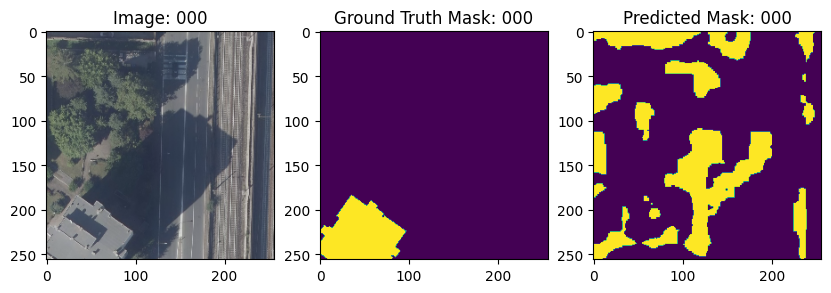

2049/2049 [==============================] - 116s 49ms/step - loss: 0.4245 - binary_accuracy: 0.8729 - val_loss: 0.4128 - val_binary_accuracy: 0.9154 - lr: 0.0010
Epoch 2/30
2049/2049 [==============================] - 61s 29ms/step - loss: 0.3667 - binary_accuracy: 0.8983 - val_loss: 0.5244 - val_binary_accuracy: 0.8886 - lr: 0.0010
Epoch 3/30
2049/2049 [==============================] - 59s 29ms/step - loss: 0.3555 - binary_accuracy: 0.9004 - val_loss: 0.5737 - val_binary_accuracy: 0.8703 - lr: 0.0010
Epoch 4/30
2049/2049 [==============================] - 59s 29ms/step - loss: 0.4605 - binary_accuracy: 0.8495 - val_loss: 0.5898 - val_binary_accuracy: 0.7464 - lr: 0.0010
Epoch 5/30
2049/2049 [==============================] - 60s 29ms/step - loss: 0.3554 - binary_accuracy: 0.9028 - val_loss: 0.3674 - val_binary_accuracy: 0.9169 - lr: 0.0010
Epoch 6/30
1/1 [==============================] - 0s 27ms/step


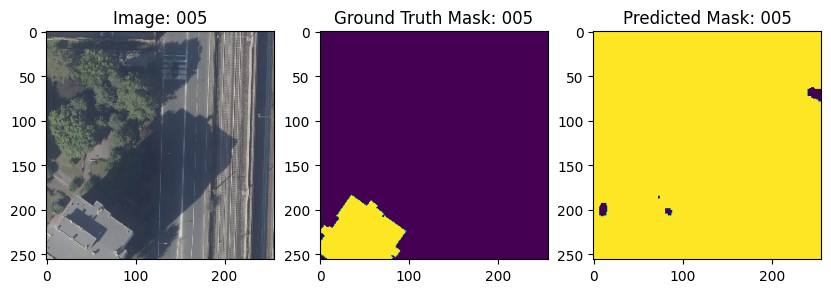

2049/2049 [==============================] - 59s 29ms/step - loss: 0.3421 - binary_accuracy: 0.9067 - val_loss: 0.4507 - val_binary_accuracy: 0.8826 - lr: 0.0010
Epoch 7/30
2049/2049 [==============================] - 58s 28ms/step - loss: 0.3330 - binary_accuracy: 0.9082 - val_loss: 0.4089 - val_binary_accuracy: 0.9048 - lr: 0.0010
Epoch 8/30
2049/2049 [==============================] - 59s 29ms/step - loss: 0.3310 - binary_accuracy: 0.9104 - val_loss: 0.9881 - val_binary_accuracy: 0.8110 - lr: 0.0010
Epoch 9/30
2049/2049 [==============================] - 59s 29ms/step - loss: 0.3287 - binary_accuracy: 0.9125 - val_loss: 0.5210 - val_binary_accuracy: 0.8769 - lr: 0.0010
Epoch 10/30
2049/2049 [==============================] - 58s 28ms/step - loss: 0.3213 - binary_accuracy: 0.9139 - val_loss: 0.4483 - val_binary_accuracy: 0.8977 - lr: 0.0010
Epoch 11/30
1/1 [==============================] - 0s 22ms/step


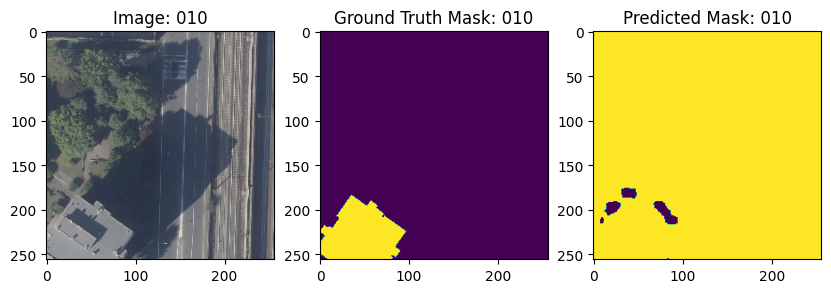

2049/2049 [==============================] - 59s 29ms/step - loss: 0.3149 - binary_accuracy: 0.9153 - val_loss: 0.3662 - val_binary_accuracy: 0.9167 - lr: 0.0010
Epoch 12/30
2049/2049 [==============================] - 59s 29ms/step - loss: 0.3144 - binary_accuracy: 0.9151 - val_loss: 0.4238 - val_binary_accuracy: 0.9042 - lr: 0.0010
Epoch 13/30
2049/2049 [==============================] - 59s 29ms/step - loss: 0.3111 - binary_accuracy: 0.9169 - val_loss: 0.5018 - val_binary_accuracy: 0.8858 - lr: 0.0010
Epoch 14/30
2049/2049 [==============================] - 59s 29ms/step - loss: 0.3050 - binary_accuracy: 0.9197 - val_loss: 0.5152 - val_binary_accuracy: 0.8782 - lr: 0.0010
Epoch 15/30
2049/2049 [==============================] - 59s 29ms/step - loss: 0.3057 - binary_accuracy: 0.9180 - val_loss: 0.4341 - val_binary_accuracy: 0.8934 - lr: 0.0010
Epoch 16/30
1/1 [==============================] - 0s 21ms/step


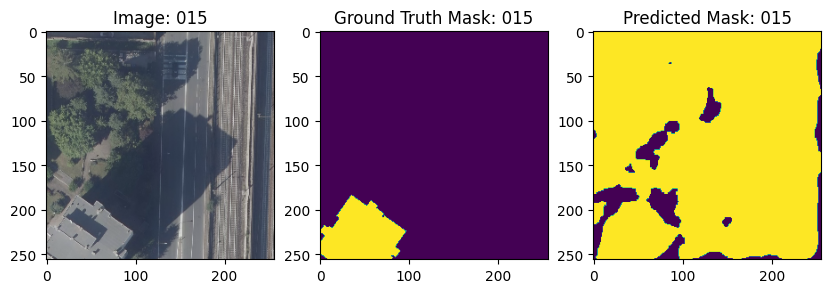

2049/2049 [==============================] - 60s 29ms/step - loss: 0.2779 - binary_accuracy: 0.9285 - val_loss: 0.5056 - val_binary_accuracy: 0.8856 - lr: 1.0000e-04
Epoch 17/30
2049/2049 [==============================] - 58s 28ms/step - loss: 0.2743 - binary_accuracy: 0.9305 - val_loss: 0.4769 - val_binary_accuracy: 0.8989 - lr: 1.0000e-04
Epoch 18/30
2049/2049 [==============================] - 59s 29ms/step - loss: 0.2659 - binary_accuracy: 0.9323 - val_loss: 0.4941 - val_binary_accuracy: 0.8946 - lr: 1.0000e-04
Epoch 19/30
2049/2049 [==============================] - 59s 29ms/step - loss: 0.2659 - binary_accuracy: 0.9332 - val_loss: 0.5107 - val_binary_accuracy: 0.8883 - lr: 1.0000e-04
Epoch 20/30
2049/2049 [==============================] - 59s 29ms/step - loss: 0.2641 - binary_accuracy: 0.9338 - val_loss: 0.5145 - val_binary_accuracy: 0.8874 - lr: 1.0000e-04
Epoch 21/30
1/1 [==============================] - 0s 23ms/step


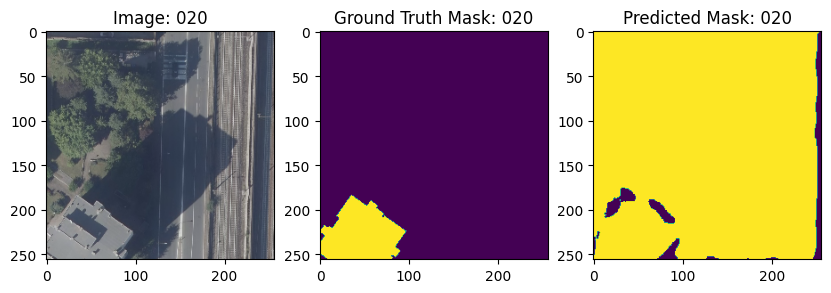

2049/2049 [==============================] - 60s 29ms/step - loss: 0.2624 - binary_accuracy: 0.9347 - val_loss: 0.4936 - val_binary_accuracy: 0.8957 - lr: 1.0000e-04
Epoch 22/30
2049/2049 [==============================] - 59s 29ms/step - loss: 0.2607 - binary_accuracy: 0.9349 - val_loss: 0.4977 - val_binary_accuracy: 0.8908 - lr: 1.0000e-04
Epoch 23/30
2049/2049 [==============================] - 59s 29ms/step - loss: 0.2579 - binary_accuracy: 0.9364 - val_loss: 0.4976 - val_binary_accuracy: 0.8924 - lr: 1.0000e-05
Epoch 24/30
2049/2049 [==============================] - 58s 29ms/step - loss: 0.2569 - binary_accuracy: 0.9366 - val_loss: 0.5088 - val_binary_accuracy: 0.8890 - lr: 1.0000e-05
Epoch 25/30
2049/2049 [==============================] - 59s 29ms/step - loss: 0.2535 - binary_accuracy: 0.9367 - val_loss: 0.5048 - val_binary_accuracy: 0.8910 - lr: 1.0000e-05
Epoch 26/30
1/1 [==============================] - 0s 22ms/step


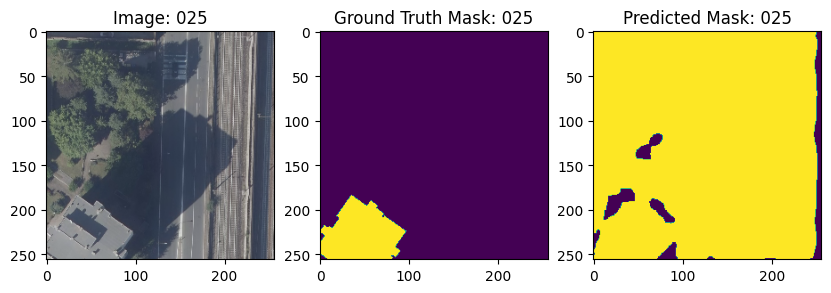

2049/2049 [==============================] - 60s 29ms/step - loss: 0.2534 - binary_accuracy: 0.9359 - val_loss: 0.5117 - val_binary_accuracy: 0.8851 - lr: 1.0000e-05
Epoch 27/30
2049/2049 [==============================] - 59s 29ms/step - loss: 0.2512 - binary_accuracy: 0.9371 - val_loss: 0.5111 - val_binary_accuracy: 0.8891 - lr: 1.0000e-05
Epoch 28/30
2049/2049 [==============================] - 58s 28ms/step - loss: 0.2536 - binary_accuracy: 0.9362 - val_loss: 0.5005 - val_binary_accuracy: 0.8925 - lr: 1.0000e-05
Epoch 29/30
2049/2049 [==============================] - 58s 28ms/step - loss: 0.2509 - binary_accuracy: 0.9373 - val_loss: 0.5150 - val_binary_accuracy: 0.8883 - lr: 1.0000e-05
Epoch 30/30
 278/2049 [===>..........................] - ETA: 46s - loss: 0.2970 - binary_accuracy: 0.9208

In [ ]:
run_training(config)

In [4]:
from models.detection_models import get_model
import matplotlib.pyplot as plt
from utils.validation_utils import compute_metrics_all_val

In [5]:
model = get_model(config)

Importing weights at checkpoint working_dir/checkpoints/unet_4_256_depthi/UNET.25-0.9655.hdf5...


In [6]:
results = compute_metrics_all_val(model, config)

05_26_1892.png 05_26_1892.png 05_26_1892.png
Running inference on05_26_1892.png...


100%|██████████| 41/41 [00:25<00:00,  1.61it/s]


02_65_1783.png 02_65_1783.png 02_65_1783.png
Running inference on02_65_1783.png...


100%|██████████| 21/21 [00:12<00:00,  1.63it/s]


02_65_1790.png 02_65_1790.png 02_65_1790.png
Running inference on02_65_1790.png...


100%|██████████| 6/6 [00:03<00:00,  1.58it/s]


02_65_1796.png 02_65_1796.png 02_65_1796.png
Running inference on02_65_1796.png...


100%|██████████| 67/67 [00:42<00:00,  1.59it/s]


02_65_1802.png 02_65_1802.png 02_65_1802.png
Running inference on02_65_1802.png...


100%|██████████| 6/6 [00:03<00:00,  1.71it/s]


03_02_5112.png 03_02_5112.png 03_02_5112.png
Running inference on03_02_5112.png...


100%|██████████| 132/132 [01:19<00:00,  1.65it/s]


03_09_5071.png 03_09_5071.png 03_09_5071.png
Running inference on03_09_5071.png...


100%|██████████| 38/38 [00:22<00:00,  1.67it/s]


03_09_5074.png 03_09_5074.png 03_09_5074.png
Running inference on03_09_5074.png...


100%|██████████| 21/21 [00:12<00:00,  1.68it/s]


03_12_5501.png 03_12_5501.png 03_12_5501.png
Running inference on03_12_5501.png...


100%|██████████| 42/42 [00:24<00:00,  1.68it/s]


03_17_5768.png 03_17_5768.png 03_17_5768.png
Running inference on03_17_5768.png...


100%|██████████| 21/21 [00:12<00:00,  1.73it/s]


05_26_1882.png 05_26_1882.png 05_26_1882.png
Running inference on05_26_1882.png...


100%|██████████| 32/32 [00:18<00:00,  1.72it/s]


05_27_1871.png 05_27_1871.png 05_27_1871.png
Running inference on05_27_1871.png...


100%|██████████| 20/20 [00:11<00:00,  1.69it/s]


In [7]:
print(results["total_acc_fix"])

0.921733438044238


In [8]:
print(results["total_acc"])

0.9396808837770025
